In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('ParticipantsData.csv')

# Clean the data
sex_encoder = LabelEncoder()
data['Sex'] = sex_encoder.fit_transform(data['Sex'])

tug_risk_encoder = LabelEncoder()
data['TUG_Risk'] = tug_risk_encoder.fit_transform(data['TUG_Risk'])

data.to_csv('cleaned_ParticipantsData.csv', index=False)

C:\Users\rad31\AppData\Local\Temp\ipykernel_23488\117201412.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # type: ignore


In [2]:
# Multiple Linear Regression
import statsmodels.api as sm

data = pd.read_csv('cleaned_ParticipantsData.csv')

X = data[['Exercise_Behavior', 'Smoking_Behavior', 'UD_HighBloodPress', 'UD_HighCholesterol',
          'UD_Diabetes', 'UD_MuscleWeakness', 'UD_Stroke', 'UD_HeartDisease']]
y = data['TUG_Risk']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TUG_Risk   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.6553
Date:                Tue, 23 Apr 2024   Prob (F-statistic):              0.707
Time:                        18:22:48   Log-Likelihood:                -21.678
No. Observations:                  34   AIC:                             59.36
Df Residuals:                      26   BIC:                             71.57
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6440      0

In [3]:
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes
nb_classifier = GaussianNB()

# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Implement Naive Bayes classifier on training data
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk:", average_accuracy)

Average Accuracy in Predicting TUG Risk: 0.5588235294117647


Average Accuracy in Predicting TUG Risk using a Decision Tree: 0.47058823529411764


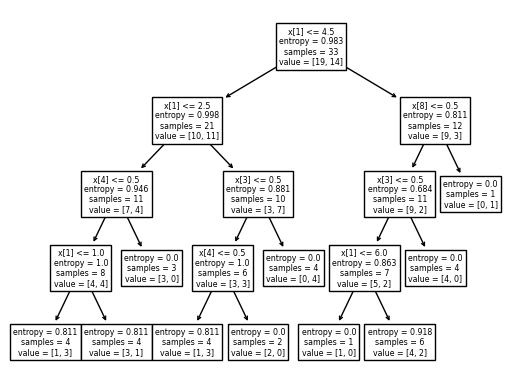

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree


# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Create Decision Tree Classifier
    dtc = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)

    #Train Decision Tree and plot
    dtc = dtc.fit(X_train, y_train)
    tree.plot_tree(dtc)

    #Predict values for test data
    y_pred = dtc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#Print out information about the accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk using a Decision Tree:", average_accuracy)
